# Problem 1

Let us define $\mathbf{X} = \mathbf{A} \diamond \mathbf{B} \in \mathbb{C}^{I^2\times R}$, where $\mathbf{A}, \mathbf{B} \in \mathbb{C}^{I\times R}$ and $\diamond$ is the Khatri-Rao product, expressed as
$$\mathbf{A} \diamond \mathbf{B} = \left[\mathbf{a}_1 \otimes \mathbf{b}_1, \mathbf{a}_2 \otimes \mathbf{b}_1, \cdots, \mathbf{a}_R \otimes \mathbf{b}_1 \right],$$

where $\mathbf{a}_i \otimes \mathbf{b}_i$ denotes the kronecker product between the $i$th column of $\mathbf{A}$ and $\mathbf{B}$.

Let us further define the following equation
$$\mathbf{X}\mathbf{u} = \mathbf{y},$$

where $\mathbf{u}$ and $\mathbf{y}$ are $\mathbb{C}^{I^2}$ vectors. For an $n\times m$ matrix $\mathbf{X}$, the soluiton is (if it has a solution):

| Relation | Type | Rank | Solution
| :-: | :-:  | :-: | :-: |
| $n=m$ | Square | rank($\mathbf{X}$)$ = n$ | $\mathbf{X}^+ = \mathbf{X}^{-1}$
| $n<m$ | Broad (right inverse) | rank($\mathbf{X}$)$ = n$ | $\mathbf{X}^+ = \mathbf{X}^{\mathsf{T}}\left(\mathbf{X}\mathbf{X}^{\mathsf{T}}\right)^{-1}$
| $n>m$ | Tall (left inverse)| rank($\mathbf{X}$)$ = m$ | $\mathbf{X}^+ = \left(\mathbf{X}\mathbf{X}^{\mathsf{T}}\right)^{-1}\mathbf{X}^{\mathsf{T}}$

Problem: Compute the following methods

1. $\mathbf{X}^+ = \left(\mathbf{X}\mathbf{X}^{\mathsf{T}}\right)^{-1}\mathbf{X}^{\mathsf{T}} = \left(\mathbf{A}\diamond\mathbf{B}\right)^{\mathsf{T}}\left(\left(\mathbf{A}\diamond\mathbf{B}\right)\left(\mathbf{A}\diamond\mathbf{B}\right)^{\mathsf{T}}\right)^{-1}$
1. $\mathbf{X}^+ = \left(\mathbf{X}\mathbf{X}^{\mathsf{T}}\right)^{-1}\mathbf{X}^{\mathsf{T}} = \left(\mathbf{A}^{\mathsf{T}}\mathbf{A} \odot \mathbf{B}^{\mathsf{T}}\mathbf{B}\right)^{-1}\left(\mathbf{A}\diamond\mathbf{B}\right)^{\mathsf{T}}$



In [9]:
from numpy import zeros, matmul, transpose as trans, multiply as hadamard
from numpy.random import rand
import timeit
from scipy.linalg import khatri_rao, pinv, inv

delta_time_meth1 = zeros((8,2))
delta_time_meth2 = zeros((8,2))
delta_time_meth3 = zeros((8,2))
i_set = [2**power for power in range(1,9)]
r_set = range(2,5,2)

for r in r_set:
    for i in i_set:
        A = rand(i,r) + 1j * rand(i,r)
        B = rand(i,r) + 1j * rand(i,r)
        X = khatri_rao(A,B)
        # method 1
        start = timeit.default_timer()
        pinv(X)
        stop = timeit.default_timer()
        delta_time_meth1[i_set.index(i),list(r_set).index(r)] = stop - start
        # method 2
        start = timeit.default_timer()
        matmul(inv(matmul(trans(khatri_rao(A,B)), khatri_rao(A,B))), trans(khatri_rao(A,B)))
        stop = timeit.default_timer()
        delta_time_meth2[i_set.index(i),list(r_set).index(r)] = stop - start
        #method 3
        start = timeit.default_timer()
        A_T_A = matmul(trans(A),A)
        B_T_B = matmul(trans(B),B)
        matmul(inv(hadamard(A_T_A,B_T_B)), trans(khatri_rao(A,B)))
        stop = timeit.default_timer()
        delta_time_meth3[i_set.index(i),list(r_set).index(r)] = stop - start

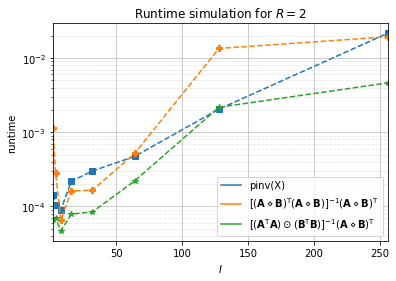

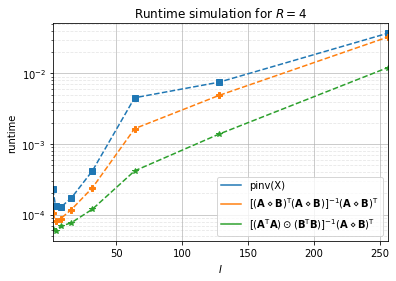

In [27]:
import matplotlib.pyplot as plt


for i, R in zip(range(2), range(2,5,2)):
    fig = plt.figure()
    ax = fig.add_subplot()
    
    ax.semilogy(i_set, delta_time_meth1[:,i], label='pinv(X)')
    ax.semilogy(i_set, delta_time_meth2[:,i], label='$[(\mathbf{A}\diamond \mathbf{B})^\mathsf{T}(\mathbf{A}\diamond \mathbf{B})]^{-1}(\mathbf{A}\diamond \mathbf{B})^\mathsf{T}$')
    ax.semilogy(i_set, delta_time_meth3[:,i], label='$[(\mathbf{A}^\mathsf{T}\mathbf{A})\odot(\mathbf{B}^\mathsf{T} \mathbf{B})]^{-1}(\mathbf{A}\diamond \mathbf{B})^\mathsf{T}$')
    ax.set_xlim(i_set[0],i_set[-1])
    ax.set_title(f'Runtime simulation for $R={R}$')
    ax.set_xlabel("$I$")
    ax.set_ylabel("runtime")
    ax.legend()
    # major_ticks = np.array(range(1,7))*1e-4
    # minor_ticks = np.arange(0, 101, 5)

    # ax.set_xticks(major_ticks)
    # ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)
    ax.grid(b=True, which='major', linestyle='-', alpha=0.8)
    ax.grid(b=True, which='minor', linestyle='--', alpha=0.3)

    lines = ax.get_lines()
    [line.set_linestyle('dashed') for line in lines]
    [line.set_marker(marker_) for line, marker_ in zip(lines, ('s', 'P', '*'))]

# Problem 2
Let

$$\mathbf{X} = \overset{N}{\underset{n}{\diamond}} \mathbf{A}_{(n)},$$

where $\mathbf{A}_{(n)} \in \mathbb{C}^{4\times 2}$. Evaluate the runtime the solutions

1. $\mathbf{X}^+ = \left(\mathbf{X}\mathbf{X}^{\mathsf{T}}\right)^{-1}\mathbf{X}^{\mathsf{T}} = \left(\mathbf{A}\diamond\mathbf{B}\right)^{\mathsf{T}}\left(\left(\mathbf{A}\diamond\mathbf{B}\right)\left(\mathbf{A}\diamond\mathbf{B}\right)^{\mathsf{T}}\right)^{-1}$
1. $\mathbf{X}^+ = \left(\mathbf{X}\mathbf{X}^{\mathsf{T}}\right)^{-1}\mathbf{X}^{\mathsf{T}} = \left(\mathbf{A}^{\mathsf{T}}\mathbf{A} \odot \mathbf{B}^{\mathsf{T}}\mathbf{B}\right)^{-1}\left(\mathbf{A}\diamond\mathbf{B}\right)^{\mathsf{T}}$

for $N \in \left\{2,4,6,8,10\right\}$

In [3]:
from cProfile import label
from numpy import zeros, matmul, transpose as trans, multiply as hadamard
from numpy.random import rand
import timeit
from scipy.linalg import khatri_rao, pinv, inv

A = rand(2,4) + 1j * rand(2,4)

n_set = range(0,9,2)
delta_time = zeros((len(n_set),3))

for n in n_set:
    X = khatri_rao(A,A)
    for _ in range(n):
        X = khatri_rao(X,A)
    # method 1
    start = timeit.default_timer()
    pinv(X)
    stop = timeit.default_timer()
    delta_time[n_set.index(n),0] = stop - start
    # method 2
    start = timeit.default_timer()
    matmul(inv(matmul(trans(khatri_rao(A,B)), khatri_rao(A,B))), trans(khatri_rao(A,B)))
    stop = timeit.default_timer()
    delta_time[n_set.index(n),1] = stop - start
    #method 3
    start = timeit.default_timer()
    A_T_A = matmul(trans(A),A)
    B_T_B = matmul(trans(B),B)
    matmul(inv(hadamard(A_T_A,B_T_B)), trans(khatri_rao(A,B)))
    delta_time[list(n_set).index(n),2] = stop - start

NameError: name 'B' is not defined

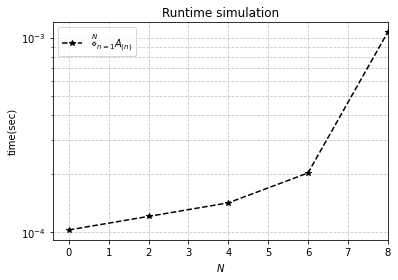

In [5]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.semilogy(n_set,delta_time[i,:], label='$\overset{N}{\diamond}_{n=1} A_{(n)}$')
    ax.set_title(f'Runtime simulation')
    ax.set_xlabel("$N$")
    ax.set_ylabel("time(sec)")
    ax.set_xlim(right=n_set[-1])
    # # Major ticks every 10^, minor ticks every 5
    # major_ticks = np.array(range(1,7))*1e-4
    # minor_ticks = np.arange(0, 101, 5)

    # ax.set_xticks(major_ticks)
    # ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both', axis='both', alpha=0.7, linestyle='--')

    lines = ax.get_lines()
    lines[0].set_linestyle('dashed')
    lines[0].set_color('black')
    lines[0].set_marker('*')
    ax.legend()